<a href="https://colab.research.google.com/github/Axl11475581/TensorFlow-Certificate/blob/main/3_0_CNN_%26_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is the Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images are from the Food101 dataset from kaggle, however they has been modified to only use two classes, pizza & steak, using the image data modification notebook.

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-13 13:53:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.81.208, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  71.8MB/s    in 1.5s    

2021-06-13 13:53:52 (71.8 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the data.
And for a computer vision project this means visualizing many samples of the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# The extra file in the pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jun 13 13:53 .
drwxr-xr-x 1 root root 4096 Jun 13 13:53 ..
-rw-r--r-- 1 root root 6148 Jun 13 13:53 .DS_Store
drwxr-xr-x 4 root root 4096 Jun 13 13:53 test
drwxr-xr-x 4 root root 4096 Jun 13 13:53 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize the images, first let's get the class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) 
# Created a list of class_names from the subdirectories
class_names = class_names[1:] # Remove .DS_Store
print(class_names)

['pizza' 'steak']


In [9]:
# Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 382, 3)


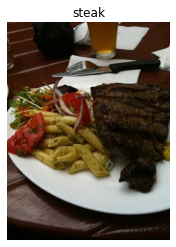

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
# View the img (actually just a big array/tensor)
img

array([[[53, 19,  7],
        [54, 20,  8],
        [55, 21,  9],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       [[55, 21,  9],
        [56, 22, 10],
        [58, 24, 12],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       [[62, 28, 16],
        [66, 32, 20],
        [73, 39, 27],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       ...,

       [[ 2,  4,  1],
        [ 1,  3,  0],
        [ 1,  3,  0],
        ...,
        [ 6,  5,  0],
        [ 6,  5,  0],
        [ 6,  5,  0]],

       [[ 2,  4,  1],
        [ 2,  4,  1],
        [ 2,  4,  1],
        ...,
        [ 6,  5,  0],
        [ 6,  5,  0],
        [ 6,  5,  0]],

       [[ 2,  4,  1],
        [ 2,  4,  1],
        [ 2,  4,  1],
        ...,
        [ 7,  6,  1],
        [ 6,  5,  0],
        [ 6,  5,  0]]], dtype=uint8)

In [12]:
# The imported image are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[53, 19,  7],
        [54, 20,  8],
        [55, 21,  9],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       [[55, 21,  9],
        [56, 22, 10],
        [58, 24, 12],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       [[62, 28, 16],
        [66, 32, 20],
        [73, 39, 27],
        ...,
        [45, 18,  9],
        [45, 18,  9],
        [46, 19, 10]],

       ...,

       [[ 2,  4,  1],
        [ 1,  3,  0],
        [ 1,  3,  0],
        ...,
        [ 6,  5,  0],
        [ 6,  5,  0],
        [ 6,  5,  0]],

       [[ 2,  4,  1],
        [ 2,  4,  1],
        [ 2,  4,  1],
        ...,
        [ 6,  5,  0],
        [ 6,  5,  0],
        [ 6,  5,  0]],

       [[ 2,  4,  1],
        [ 2,  4,  1],
        [ 2,  4,  1],
        ...,
        [ 7,  6,  1],
        [ 6,  5,  0],
        [ 6,  5,  0]]], dtype=uint8)>

In [13]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 382, 3)

In [14]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.20784314, 0.0745098 , 0.02745098],
        [0.21176471, 0.07843137, 0.03137255],
        [0.21568627, 0.08235294, 0.03529412],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       [[0.21568627, 0.08235294, 0.03529412],
        [0.21960784, 0.08627451, 0.03921569],
        [0.22745098, 0.09411765, 0.04705882],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       [[0.24313725, 0.10980392, 0.0627451 ],
        [0.25882353, 0.1254902 , 0.07843137],
        [0.28627451, 0.15294118, 0.10588235],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       ...,

       [[0.00784314, 0.01568627, 0.00392157],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0

In [15]:
# Normalize the data
# Get all the pixel values between 0 & 1
img/255

array([[[0.20784314, 0.0745098 , 0.02745098],
        [0.21176471, 0.07843137, 0.03137255],
        [0.21568627, 0.08235294, 0.03529412],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       [[0.21568627, 0.08235294, 0.03529412],
        [0.21960784, 0.08627451, 0.03921569],
        [0.22745098, 0.09411765, 0.04705882],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       [[0.24313725, 0.10980392, 0.0627451 ],
        [0.25882353, 0.1254902 , 0.07843137],
        [0.28627451, 0.15294118, 0.10588235],
        ...,
        [0.17647059, 0.07058824, 0.03529412],
        [0.17647059, 0.07058824, 0.03529412],
        [0.18039216, 0.0745098 , 0.03921569]],

       ...,

       [[0.00784314, 0.01568627, 0.00392157],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0

## A (Typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

* Input Image(s): Target images you'd like to discover patterns in. Whatever you can take a photo (or video) of.
* Input layer: takes in target images and preprocesses them for further layers. `input_shape = [batch_size, image_height, image_width, color_channels]`
* Convolution layer: Extracts/learns the most important features from target images. `multiple, can create with tf.keras.layers.ConvXD(X can be multiple values)`
* Hidden activation: Adds non-linerity to learned features (non-straight lines). Usually ReLU `tf.keras.activations.relu`
* Pooling layer: Reduces the dimensionality of learned image features. Average `tf.keras.layers.AvgPool2D` or Max `tf.keras.layers.MaxPool2D`
* Fully connected layer: Futher refines learned features from convolution layers. `tf.keras.layers.Dense`
* Output layer: Takes learned features and outputs them in shape of target labels. `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)
* Output activation: Adds non-linearities to output layer. `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activation.sofmax`

## An end-to-end example

We've checked out the data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes. 

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them. From now on, that 50,76% will be our baseline. 

The code in the following cell replicate an end-to-end way to model the pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

- Resource: The architecture we're using below is a scaled-down version of VGG-16, a convolutinal neural network which came 2nd in 2014 ImageNet classification competition.

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model 
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 200ms/step - loss: 0.5789 - accuracy: 0.6887 - val_loss: 0.3766 - val_accuracy: 0.8480
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4251 - accuracy: 0.8080 - val_loss: 0.3571 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3844 - accuracy: 0.8340 - val_loss: 0.3562 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3611 - accuracy: 0.8547 - val_loss: 0.3178 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3067 - accuracy: 0.8720 - val_loss: 0.3089 - val_accuracy: 0.8740


After 5 epochs, the model beat the baseline score of 50.76% accuracy (by getting ~85% on the training set and ~85% accuracy on the test set)

However, the model only went through a binary classification problem rather than all of the 101 classes in the Food101 dataset, so the metrics can not be compare.

In [17]:
# Check out the layers in the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Replicate the model built in a previous section to see if it works with the image data.

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 1.0386 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
# Check the second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than the CNN (model_1), model_2 perfroms terribly, let's try to improve it

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.1024 - accuracy: 0.6473 - val_loss: 0.6805 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6985 - accuracy: 0.6980 - val_loss: 0.8715 - val_accuracy: 0.6580
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5777 - accuracy: 0.7487 - val_loss: 0.8490 - val_accuracy: 0.6160
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.5501 - accuracy: 0.7633 - val_loss: 0.5314 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.5983 - accuracy: 0.7433 - val_loss: 0.4432 - val_accuracy: 0.8060


In [21]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Despite having even more trainable parameters than model_2 and even 500x than model_1 it still does not out perform model_1. 

This shows the power of convolutional neural networks and their ability to learn patterns despite using less parameters.

## Binary Classification: let's break it down


1. Become one with the data
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied



### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (289, 512, 3)


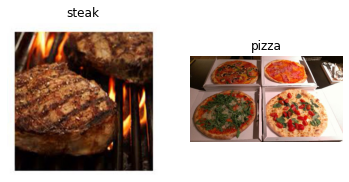

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step is to turn the data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons: 

1. 10,000 images (or more) might not fit into the memory of the processor (GPU). 
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well

In [24]:
!nvidia-smi

Sun Jun 13 13:56:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |   2270MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Load in the image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

Note: In deep learning, there is almost an infinite amount of architectures you could create. One of the best ways to get started is to start with something simple and see if it works on the data and then introduce complexity as required (e.g. look for the best model for the problem that's perfroming the best on the field)

In [31]:
# Make the creation of the model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model(baseline)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3, 3), # the size of the sliding window going across an input
         strides=(1, 1), # the size of the step the sliding window takes across an input 
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)                 
])

In [33]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [35]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.9031 - accuracy: 0.7020 - val_loss: 0.4250 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4440 - accuracy: 0.8040 - val_loss: 0.4145 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3340 - accuracy: 0.8593 - val_loss: 0.3857 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.1760 - accuracy: 0.9453 - val_loss: 0.4981 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.0614 - accuracy: 0.9867 - val_loss: 0.4881 - val_accuracy: 0.8000


### 5. Evaluating the model

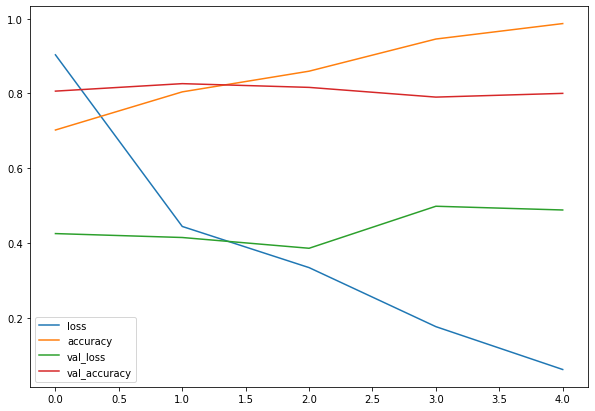

In [37]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [38]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

Note: When a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

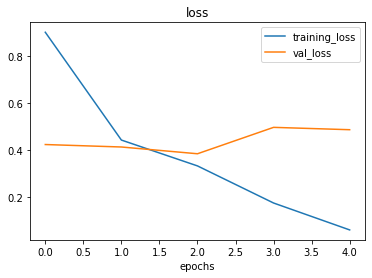

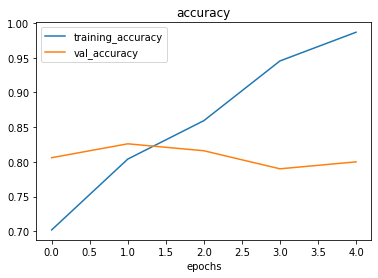

In [39]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

Note: Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences the model may be **overfitting**.

### 6. Adjust the model parameters

3 steps in fitting a machine learning model:

1. Create baseline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Reduce overfitting:

- Add data augmentation
- Add regularization layers (such as MaxPoll2D)
- Add more data 

Note: Reducing overfitting is also known as **regularization**

In [40]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6766 - accuracy: 0.5747 - val_loss: 0.5777 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4953 - accuracy: 0.7707 - val_loss: 0.3909 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4207 - accuracy: 0.8140 - val_loss: 0.4154 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4223 - accuracy: 0.8047 - val_loss: 0.3426 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.3792 - accuracy: 0.8300 - val_loss: 0.3528 - val_accuracy: 0.8440


In [43]:
# Get a summary of the model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

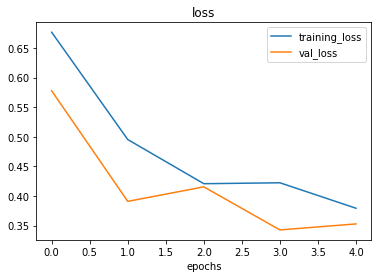

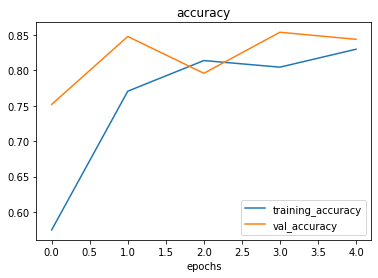

In [44]:
# Plot loss curves
plot_loss_curves(history_5)

## Finding data augmentation

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image? 

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering the training data, leading it to have more diversity and in turn allowing the models to learn more generalizable patterns (in theory). Altering might mean adjusting the rotation of an image, flipping it cropping it or something similar.

The next cells visualize this process.

In [46]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


Note: Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters the images are left as they are in the directories but are modified as they're loaded into the model.

In [47]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented, only data (images)

showing image number: 8


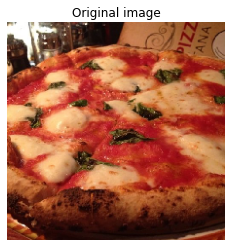

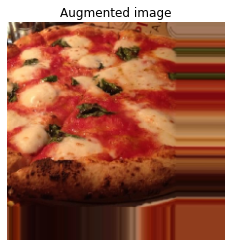

In [48]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

With the augmented data now let's built a model

In [49]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 424ms/step - loss: 0.7045 - accuracy: 0.5620 - val_loss: 0.7318 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 418ms/step - loss: 0.7157 - accuracy: 0.5033 - val_loss: 0.6841 - val_accuracy: 0.4980
Epoch 3/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6854 - accuracy: 0.5000 - val_loss: 0.6756 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6820 - accuracy: 0.5100 - val_loss: 0.6579 - val_accuracy: 0.5180
Epoch 5/5
47/47 [==============================] - 20s 433ms/step - loss: 0.6749 - accuracy: 0.5853 - val_loss: 0.7560 - val_accuracy: 0.5000


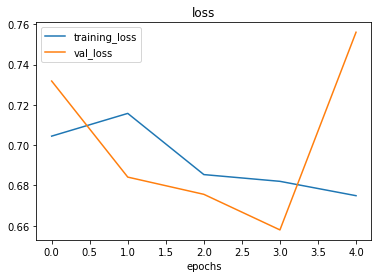

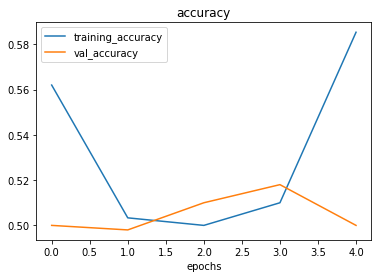

In [50]:
# Check our models training curves
plot_loss_curves(history_6)

In [51]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
29/47 [=================>............] - ETA: 7s - loss: 0.6508 - accuracy: 0.6104

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

Note:  When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use transfer learning to leverage what another image model has learn and adjust it for our own use case

## Making a prediction with the trained model on custom data

In [ ]:
# Classes we're working with
print(class_names)

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of the image
steak.shape

Note: When training a neural network on custom data, it's important to preprocess said data into the same format as the data the model was trained on.

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

Visualize the image as well as the model's prediction

In [ ]:
# Class names
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test the model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Try the model on another image

In [ ]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

With the binary classification problem done (pizza vs. steak) now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data 
3. Create a model (starting with a baseline)
4. Fit the model (overfit it to make sure it works). 
5. Evaluate the model 
6. Adjust different hyperparameters and improve the model.
7. Repeat until satisfied

### 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")